##### Exploratory Data Analysis (EDA) to predict new mineral deposits based on known deposits.

The dataset includes key features such as STATE, COMMODITY, METALLOGENESIS, MORPHOGENESIS, and FORMATION.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
final_dataset = pd.read_csv('final_combined_data.csv')


In [61]:
# Step 1: Dataset Overview
print("Dataset Overview:")
final_dataset.info()

# Step 2: Descriptive Statistics for Key Features
print("\nDescriptive Statistics:")
descriptive_stats = final_dataset.describe(include='object')
print(descriptive_stats)


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Element         261 non-null    object 
 1   LOCALITY        261 non-null    object 
 2   STATE           261 non-null    object 
 3   TOPOSHEET       261 non-null    object 
 4   LATITUDE        261 non-null    object 
 5   LONGITUDE       261 non-null    object 
 6   COMMODITY       261 non-null    object 
 7   HOSTROCK        261 non-null    object 
 8   MORPHOGENESIS   261 non-null    object 
 9   FORMATION       261 non-null    object 
 10  METALLOGENESIS  261 non-null    object 
 11  LATDD           225 non-null    float64
 12  LONDD           222 non-null    float64
dtypes: float64(2), object(11)
memory usage: 26.6+ KB

Descriptive Statistics:
       Element  LOCALITY      STATE TOPOSHEET LATITUDE LONGITUDE COMMODITY  \
count      261       261        261       261

In [62]:
# Top Features Analysis
print("\nTop Features Analysis:")
top_features = {
    "Top States by Deposits": final_dataset['STATE'].value_counts(),
    "Top Commodities": final_dataset['COMMODITY'].value_counts(),
    "Top Metallogenesis Areas": final_dataset['METALLOGENESIS'].value_counts(),
    "Top Formations": final_dataset['FORMATION'].value_counts()
}
for key, value in top_features.items():
    print(f"\n{key}:\n", value)


Top Features Analysis:

Top States by Deposits:
 STATE
KARNATAKA            64
ORISSA               46
ANDHRA PRADESH       32
JHARKHAND            23
RAJASTHAN            23
CHATTISGARH          17
MADHYA PRADESH       11
MAHARASTRA           11
TAMILNADU            11
GUJARAT               8
GOA                   5
KERALA                4
JAMMU & KASHMIR       2
ORISSA (?)            1
KARNATAKA, A.P        1
WEST BENGAL           1
ARUNACHAL PRADESH     1
Name: count, dtype: int64

Top Commodities:
 COMMODITY
Iron         79
Gold         51
Bauxite      49
Manganese    32
Lead-Zinc    31
Diamond      12
Baryte        7
Name: count, dtype: int64

Top Metallogenesis Areas:
 METALLOGENESIS
EAST COAST PROVINCE              17
CHITRADURGA BELT                 12
SAUSAR BELT                      10
BONAI-NOAMUNDI-JAMDA PROVINCE    10
HUTTI MASKI BELT                  9
                                 ..
SHIMOGA SCHIST BELT               1
JONAGIRI SCHIST BELT              1
WURRYA HILL 

Top Features:

    1. Top States by Deposits:

        Karnataka leads with the highest number of deposits, followed by Odisha and Andhra Pradesh.(alligning with known mineral rich regions in india)
    
    2. Top Commodities:
    
        Iron(30%), Gold(19%), and Bauxite(18%) are the most frequent commodities in the dataset.
    
    3. Top Metallogenesis Areas:
    
        East Coast Province and Chitradurga Belt are the most dominant metallogenesis areas.
    
    4. Top Formations:
    
        Eastern Greenstone and Eastern Ghat Supergroup are the most represented formations.

In [63]:
# Unique States
print("\nUnique States:")
unique_states = final_dataset['STATE'].unique()
print(unique_states)


Unique States:
['ORISSA' 'ANDHRA PRADESH' 'GUJARAT' 'JHARKHAND' 'CHATTISGARH'
 'MADHYA PRADESH' 'KERALA' 'MAHARASTRA' 'KARNATAKA' 'TAMILNADU'
 'RAJASTHAN' 'ORISSA (?)' 'KARNATAKA, A.P' 'JAMMU & KASHMIR' 'WEST BENGAL'
 'ARUNACHAL PRADESH' 'GOA']


Here Orissa(?) shows that the deposit region(Nuia) is present between Orissa and Jharkhand Border.


Distribution Analysis:

Pivot Table (State vs Commodity):
COMMODITY          Baryte  Bauxite  Diamond  Gold  Iron  Lead-Zinc  Manganese
STATE                                                                        
ANDHRA PRADESH          3        3        5    12     1          4          4
ARUNACHAL PRADESH       0        0        0     0     0          1          0
CHATTISGARH             0        5        6     1     4          0          1
GOA                     0        0        0     0     0          0          5
GUJARAT                 0        8        0     0     0          0          0
JAMMU & KASHMIR         0        0        0     0     0          2          0
JHARKHAND               0       10        0     3     8          2          0
KARNATAKA               1        1        0    25    31          0          6
KARNATAKA, A.P          0        0        0     0     1          0          0
KERALA                  0        1        0     3     0          0          0
MADHY

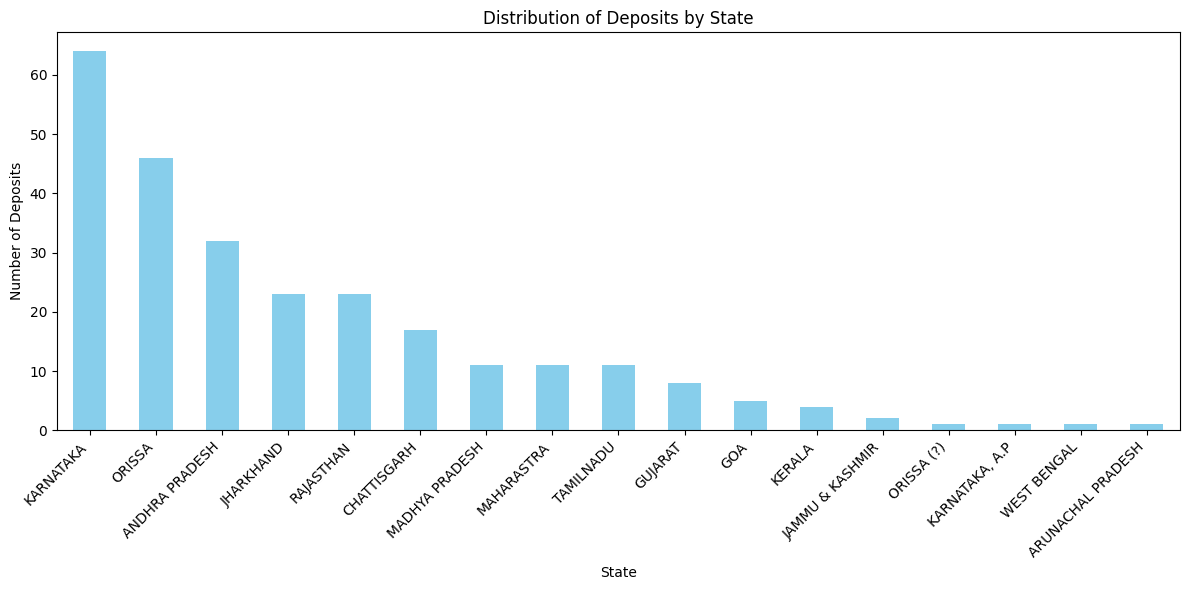

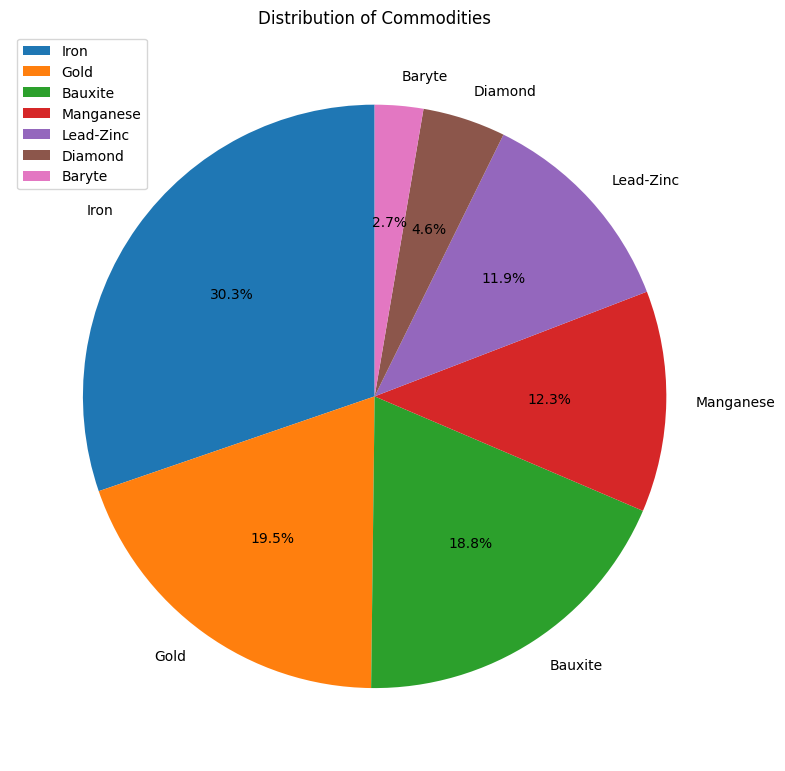

In [64]:
# Step 3: Distribution Analysis
print("\nDistribution Analysis:")
state_distribution = final_dataset['STATE'].value_counts()
commodity_distribution = final_dataset['COMMODITY'].value_counts()

# Feature Interrelationships - Pivot Table
print("\nPivot Table (State vs Commodity):")
pivot_table = final_dataset.pivot_table(
    index='STATE',
    columns='COMMODITY',
    aggfunc='size',
    fill_value=0
)
print(pivot_table)

# Plot: Distribution of deposits by state
plt.figure(figsize=(12, 6))
state_distribution.plot(kind='bar', color='skyblue')
plt.title("Distribution of Deposits by State")
plt.xlabel("State")
plt.ylabel("Number of Deposits")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot: Distribution of commodities
plt.figure(figsize=(8, 8))
commodity_distribution.plot(kind='pie', autopct='%1.1f%%', legend=True, startangle=90, labeldistance=1.1)
plt.title("Distribution of Commodities")
plt.ylabel("")
plt.tight_layout()
plt.show()


Karnataka and Odisha are hotspots for iron and gold deposits, while Andhra Pradesh is significant for bauxite.


Geological Relationships (Top Metallogenesis x Morphogenesis):


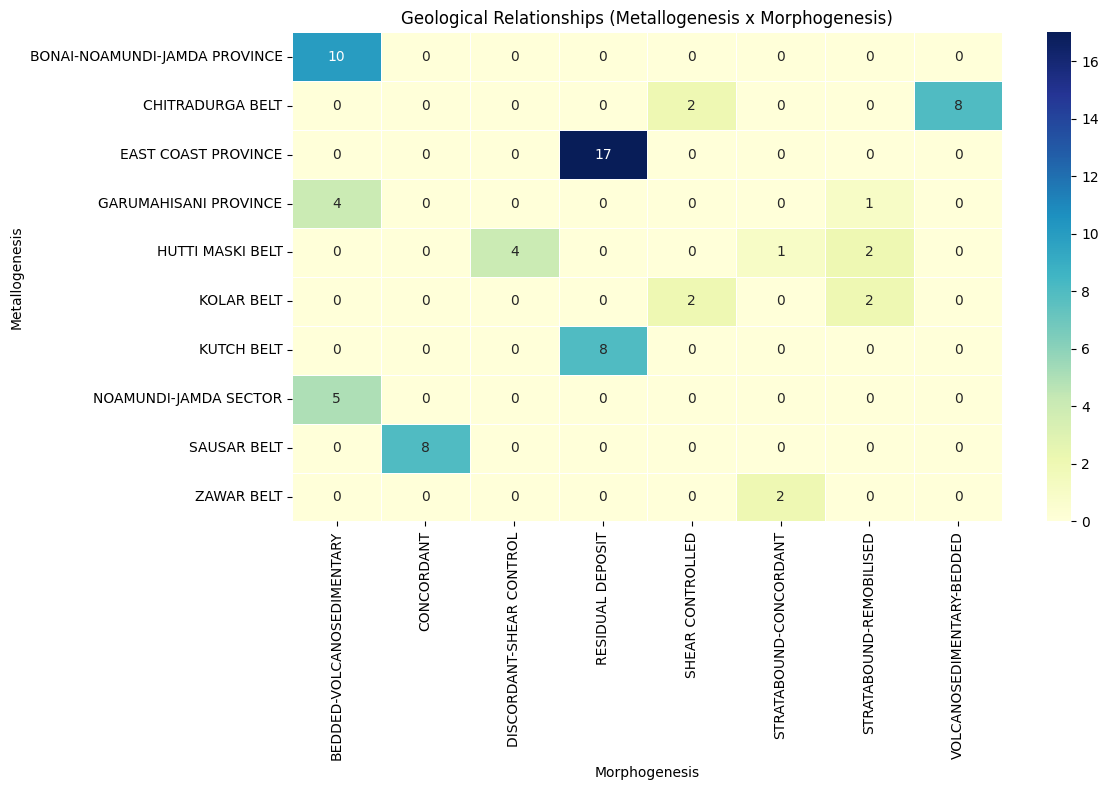

In [65]:
# Step 4: Simplified Metallogenesis and Morphogenesis Relationships
print("\nGeological Relationships (Top Metallogenesis x Morphogenesis):")

# Simplify by grouping rare categories under "Other"
top_metallogenesis = final_dataset['METALLOGENESIS'].value_counts().nlargest(10).index
top_morphogenesis = final_dataset['MORPHOGENESIS'].value_counts().nlargest(10).index

filtered_data = final_dataset[
    (final_dataset['METALLOGENESIS'].isin(top_metallogenesis)) &
    (final_dataset['MORPHOGENESIS'].isin(top_morphogenesis))
]

# Count relationships between simplified categories
geological_relationships = filtered_data.groupby(['METALLOGENESIS', 'MORPHOGENESIS']).size().unstack(fill_value=0)

# Heatmap for Metallogenesis vs Morphogenesis
plt.figure(figsize=(12, 8))
sns.heatmap(geological_relationships, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Geological Relationships (Metallogenesis x Morphogenesis)")
plt.xlabel("Morphogenesis")
plt.ylabel("Metallogenesis")
plt.tight_layout()
plt.show()


Metallogenesis x Morphogenesis:

    Top Metallogenesis Areas:
        East Coast Province and Chitradurga Belt are associated with Residual Deposits and Volcanosedimentary Morphogenesis.
    Heatmap Insights:
        A clear clustering of certain metallogenesis areas with specific morphogenesis types is visible, such as:
            East Coast Province with Residual Deposits.
            Chitradurga Belt with Volcanosedimentary-Bedded morphogenesis.


Commodity-Formation Relationships:
COMMODITY  FORMATION                   
Baryte     ALWAR Gp.                        1
           ARAVALLI                         1
           BABABUDAN(DHARWAR).              1
           CHITRAVATI Gp.                   1
           CUMBUM(CUDDAPAH)                 1
           MAHAKOSHAL Gp.                   1
           NALLAMALAI Gp(CUDDAPAH Sgp.)     1
Bauxite    EASTERN GHAT Sgp.               18
           CHOTANAGPUR GNEISSIC COMPLEX    13
           DECCAN TRAP                     12
Name: count, dtype: int64


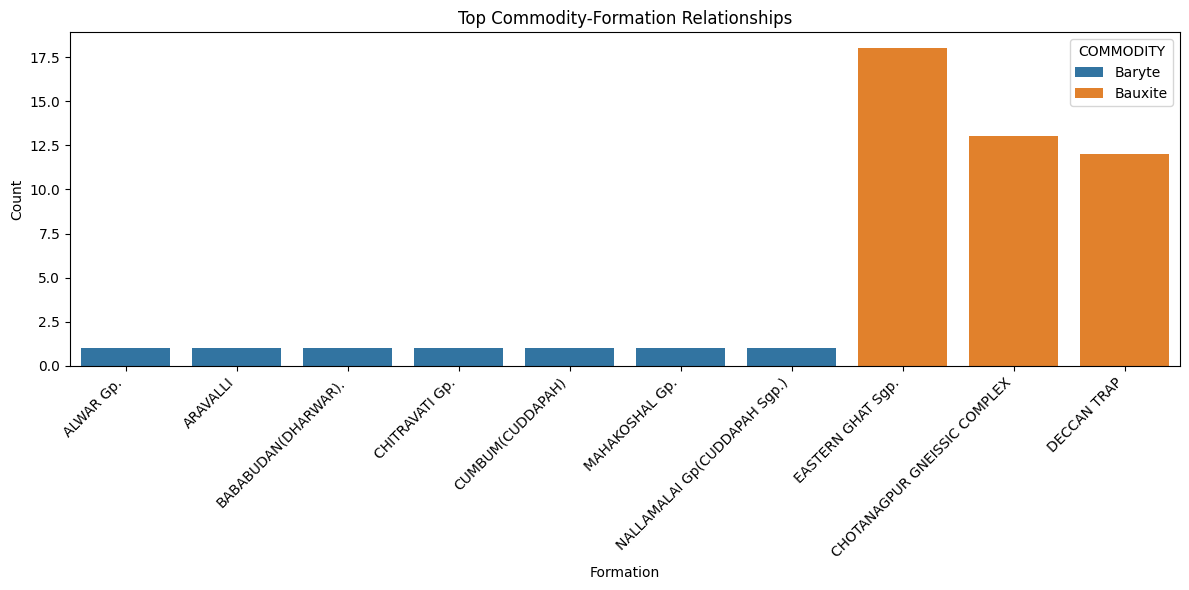

In [66]:
# Step 5: Commodity Analysis
print("\nCommodity-Formation Relationships:")
commodity_formation = final_dataset.groupby(['COMMODITY'])['FORMATION'].value_counts()
print(commodity_formation.head(10))

# Bar plot for commodity vs formations
commodity_formation_data = commodity_formation.head(10).reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(
    data=commodity_formation_data,
    x='FORMATION', y='Count', hue='COMMODITY'
)
plt.title("Top Commodity-Formation Relationships")
plt.xlabel("Formation")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Bauxite: Found mostly in the Eastern Ghat Supergroup and Chotanagpur Gneissic Complex.

Iron: Associated with Banded Iron Formation (BIF) and Volcanics.

Gold: Strongly tied to Eastern Greenstone formations.

Feature Engineering Opportunities

Proximity to faults, rivers, or known mineral belts for spatial features.

Interactions between MORPHOGENESIS and FORMATION for geological insights.

Regional deposit density (e.g., deposits per state or locality).

In [67]:
# Step 8: Rare Occurrences
print("\nRare Features:")
rare_features = {
    "Rare Commodities": final_dataset['COMMODITY'].value_counts().tail(5),
    "Rare Metallogenesis Areas": final_dataset['METALLOGENESIS'].value_counts().tail(5),
    "Rare Formations": final_dataset['FORMATION'].value_counts().tail(5)
}
for key, value in rare_features.items():
    print(f"\n{key}:\n", value)



Rare Features:

Rare Commodities:
 COMMODITY
Bauxite      49
Manganese    32
Lead-Zinc    31
Diamond      12
Baryte        7
Name: count, dtype: int64

Rare Metallogenesis Areas:
 METALLOGENESIS
SHIMOGA SCHIST BELT     1
JONAGIRI SCHIST BELT    1
WURRYA HILL RANGE       1
AGNIGUNDLA BELT         1
GHUGRA-KAYAR BELT       1
Name: count, dtype: int64

Rare Formations:
 FORMATION
SLEEMABAD Fm.            1
SARGUR Gp.               1
KOLAR GREENSONE          1
SONAKHAN Gp.             1
CHITRADURGA BELT BELT    1
Name: count, dtype: int64


Rare Commodities:

    Baryte and Diamond are the least represented commodities.

Rare Metallogenesis Areas:

    Agnigundla Belt and Ghugra-Kayar Belt appear only once.

Rare Formations:

    Sleemabad Fm. and Sonakhan Gp. are the rarest formations.


#### Rare features may represent underexplored opportunities or unique mineral conditions.

In [68]:
# Step 10: Region-Based Analysis
print("\nRegion-Based Analysis (Deposits by State and Commodity):")
region_analysis = final_dataset.groupby(['STATE', 'COMMODITY']).size().unstack(fill_value=0)
print(region_analysis.head(10))



Region-Based Analysis (Deposits by State and Commodity):
COMMODITY          Baryte  Bauxite  Diamond  Gold  Iron  Lead-Zinc  Manganese
STATE                                                                        
ANDHRA PRADESH          3        3        5    12     1          4          4
ARUNACHAL PRADESH       0        0        0     0     0          1          0
CHATTISGARH             0        5        6     1     4          0          1
GOA                     0        0        0     0     0          0          5
GUJARAT                 0        8        0     0     0          0          0
JAMMU & KASHMIR         0        0        0     0     0          2          0
JHARKHAND               0       10        0     3     8          2          0
KARNATAKA               1        1        0    25    31          0          6
KARNATAKA, A.P          0        0        0     0     1          0          0
KERALA                  0        1        0     3     0          0          0


State-Commodity Relationships:

    Karnataka leads in both Iron (31 deposits) and Gold (25 deposits).
    Odisha excels in Bauxite (14 deposits) and Iron (24 deposits).
    Rajasthan is notable for Lead-Zinc deposits (20).

Summary of EDA

    Dominant Regions:
        Karnataka, Odisha, and Andhra Pradesh stand out for mineral richness.
    Geological Highlights:
        Residual and Volcanosedimentary morphogenesis are key indicators of deposits.
    Commodity Insights:
        Iron and gold are dominant commodities; Bauxite is geographically localized.
    Rare Opportunities:
        Rare formations and commodities like baryte and diamond highlight potential for exploration.